# Enter Student Name & ID

In [1]:
student_id = 400101504  #@param {type:"integer"}
student_name = "Amirreza Zameni" #@param {type:"string"}

print("your student id:", student_id)
print("your name:", student_name)

your student id: 400101504
your name: Amirreza Zameni


## Part 1. Implementing Your Own PCA Function.

### 1.1 Complete the function below using only the `numpy` library.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_multiple_r2_on_same_axis(train_test_ratios, r2_values_list, labels,ylim,x_label,y_label,title,log):

    assert len(r2_values_list) == len(labels), "Number of R² value vectors must match the number of labels"
    plt.figure(figsize=(10, 6))
    for i, r2_values in enumerate(r2_values_list):
        if(log==0):
            plt.plot(train_test_ratios, r2_values,marker='o', label=labels[i])
        elif(log==1):
            plt.semilogx(train_test_ratios, r2_values,marker='o', label=labels[i])
        elif(log==2):
            plt.semilogx(train_test_ratios, r2_values, label=labels[i])
        elif(log==3):
            plt.semilogy(train_test_ratios, r2_values, label=labels[i])
        elif(log==4):
            plt.plot(train_test_ratios, r2_values, label=labels[i])
        elif(log==5):
            plt.loglog(train_test_ratios, r2_values, label=labels[i])
    plt.xlabel(x_label)#'Train Ratio')
    plt.ylabel(y_label)#'R² Value')
    plt.title(title)#'R² vs. Train Ratio')
    plt.ylim(ylim)
    plt.grid(True)
    plt.legend()
    plt.show()
def multyx(arr):
    arr.reverse()
    res=arr[0]
    for i in range(len(arr)-1):
        res=np.matmul(arr[i+1],res)
    return res

In [3]:
class myPCA:
    def __init__(self,X,num_components):
        self.X=X
        self.num_components=num_components
    def compute_covariance_matrix(self):
        # Subtract the mean from each feature
        X_centered = self.X - np.mean(self.X, axis=0)
        # Compute the covariance matrix
        cov_matrix = np.dot(X_centered.T, X_centered) / (self.X.shape[0] - 1)
        return cov_matrix
    
    def reduced_data_set(self):
        cov_matrix=self.compute_covariance_matrix()
        
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

        # Sort eigenvalues in descending order
        sorted_indices = np.argsort(eigenvalues)[::-1]
        self.components = eigenvectors[:, sorted_indices[:self.num_components]]

        X_centered = self.X - np.mean(self.X, axis=0)
        return np.dot(X_centered, self.components)
    

def myPCA_function(X,num_components):
    temp_pca=myPCA(X,num_components)
    return temp_pca.reduced_data_set()    


### 1.2 Perform your PCA function on the IRIS dataset, reduce it to 2D, and plot the results.

In [4]:
#import matplotlib as plt
from sklearn.datasets import load_iris

(150, 4) (150, 2)


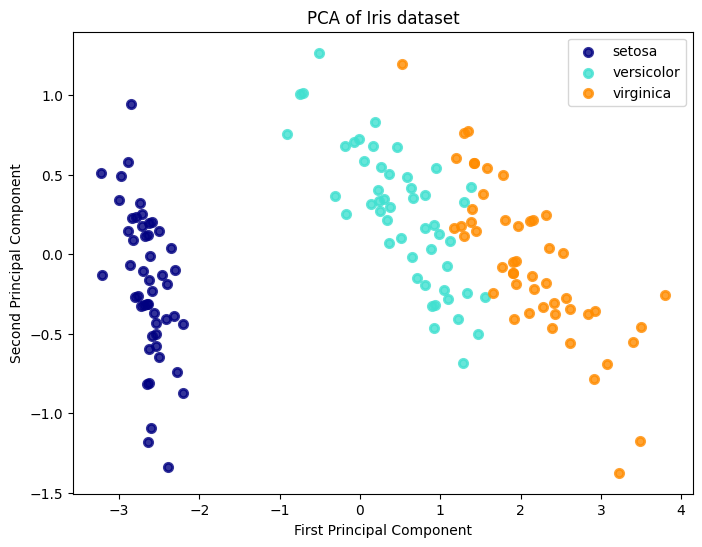

In [5]:
# myPCA on IRIS 
num_component=2
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
X_transformed=myPCA_function(X,num_component)
print((X.shape),X_transformed.shape)



plt.figure(figsize=(8, 6))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_transformed[y == i, 0], X_transformed[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title("PCA of Iris dataset")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()

## Part 2. Faces Dataset

The dataset contains a total of 40 folders, each contains 10 images depicting a specific individual in ten different states.

### 2.1  Describe eigenfaces and how they are related to PCA.
As we know, face images usually contain an abundance of information about a person’s face. Unfortunately, some of this information can even lead machine learning models astray. To accurately identify a face, we first reduce the dimensionality of the data while retaining key features related to facial components. These features are aligned with the direction of eigenfaces.<br>

The eigenvectors are derived from the covariance matrix of the probability distribution over the high-dimensional vector space of face images. Eigenfaces themselves form a basis set, which includes all images used to construct the covariance matrix. This approach achieves dimension reduction by allowing a smaller set of basis images to represent the original training images. Classification becomes possible by comparing how faces are represented using this basis set.<br>

The steps are followed as discribed below just like PCA:<br>
First, we have to collect a set of facial images. Then, we have to preprocess these images to reduce any kind of irrelevant variations.<br>

The most common preprocessing step is to align the eyes, the nose, and the mouth. Then, we can also normalize the lightness and the pose of the images. It is very important to apply these preprocessing steps because they let the algorithm focus on the appearance-related regions of the image and disregard other irrelevant facial parts.<br>

After preprocessing, we transform the images into a set of feature vectors that encode the visual information. The covariance matrix of these vectors corresponds to the correlations between the various features of the faces in our dataset. So, we’ll use the covariance matrix to get the eigenfaces.<br>

More specifically, we compute the eigenvectors of the covariance matrix that span the latent space of the facial variations. These eigenvectors will then be used as the basis images of the eigenface representation of a new test facial image.<br>

`Answer 2.1: `


### 2.2 Read the given dataset and create train and test matrices. 
For each person, use the first five images for training and the second five images for test (`X_train`, `X_test`). Also, create labels for them (`y_train`, `y_test`).

Note: For reading the images, you can use opencv library. You can install this library using the below command in terminal:

`pip install opencv-python`

### 2.3 Performing PCA.

Perform PCA on the data and reduce the dimensionality to a suitable range (e.g., between 40 and 50).

### 2.4 Training a Classifier
Train an LDA classifier on the PCA-transformed data and report the accuracy.

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

In [31]:
import os
import glob
import cv2
import numpy as np
import tensorflow as tf

from sklearn.decomposition import PCA

# Define the path to your data folder (replace with your actual path)
data_path = 'ORL'

# Load images from each folder
data = []
labels=[]

for i in range(1, 41):  # Assuming you have 40 folders (s1 to s40)
    folder_path = os.path.join(data_path, f's{i}')
    for j in range(1, 11):  # Assuming each folder has 10 images (1.bmp to 10.bmp)
        image_path = os.path.join(folder_path, f'{j}.bmp')
        data.append(cv2.imread(image_path,0))
        labels.append(i)

# Convert the list of images to a numpy array
data = np.stack(data)  # Shape: [num_images, height, width, channel]
labels=np.array(labels)
train_indices = np.array([int(i) for i in range (len(data)) if i % 10 in (0, 1, 2, 3, 4)])
test_indices = np.array([int(i) for i in range (len(data)) if i % 10 in (5, 6, 7, 8, 9)])
print(data.shape)
# Split the data into training and test sets
train_data = data[train_indices,:,:]  # Use 5 images per person for training
test_data = data[test_indices,:,:]  # Use the remaining 5 images for testing
train_data_label=labels[train_indices]
test_data_label=labels[test_indices]

# Now you can use 'train_data' and 'test_data' for your machine learning model
# Remember to preprocess the data (e.g., normalize pixel values) before feeding it to your network.

# Optional: If you want to assign labels (1 to 40) to each image, create a corresponding label array.
# Assuming you have 40 people in your dataset

# Note: You can adjust the paths and file naming conventions according to your actual data structure.
flattened_train_data = train_data.reshape(len(train_data[:,0,0]), -1)
flattened_test_data = test_data.reshape(len(test_data[:,0,0]), -1)
flattened_data = data.reshape(len(data[:,0,0]), -1)






(400, 48, 48)


In [40]:
n_components=50

pca = PCA(n_components=n_components)
pca.fit(flattened_data)
transformed_train = pca.transform(flattened_train_data)
transformed_test = pca.transform(flattened_test_data)

#img_reconstructed = pca.inverse_transform(img_transformed)
print(transformed_test.shape)

(200, 50)


In [42]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

lda = LDA()  # Choose the number of components
lda.fit_transform(transformed_train, train_data_label)
y_pred = lda.predict(transformed_test)
accuracy = accuracy_score(test_data_label, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.96


### 2.5 Varying PCA Dimensions

Repeat the process for different dimensions of PCA (vary from 100 to 40) and discuss the results.

How many features do you think are sufficient?<br>
somthing between 40-50 is sufficient above we got 0.96 accuracy using 50 features so it should be alright, 40 is also a
good pick according to below plot.


In [46]:
num_features=my_array = np.arange(start=30, stop=102, step=2)
accuracies=[]
for i in num_features:
    n_components=i
    pca = PCA(n_components=n_components)
    pca.fit(flattened_data)
    transformed_train = pca.transform(flattened_train_data)
    transformed_test = pca.transform(flattened_test_data)
    lda = LDA()  # Choose the number of components
    lda.fit_transform(transformed_train, train_data_label)
    y_pred = lda.predict(transformed_test)
    accuracy = accuracy_score(test_data_label, y_pred)
    #print(f"Accuracy: {accuracy:.2f}")
    accuracies.append(accuracy)
    #img_reconstructed = pca.inverse_transform(img_transformed)
    #print(transformed_test.shape)
accuracies=np.array(accuracies)    
    

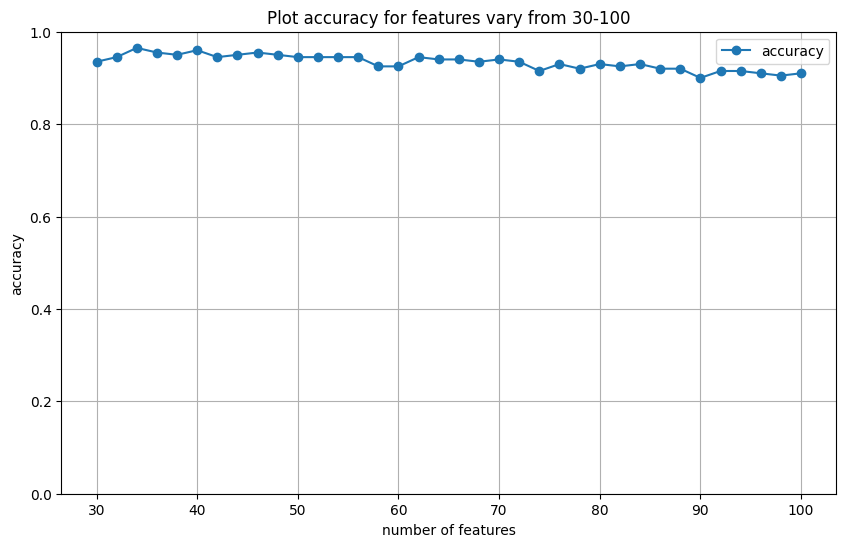

In [47]:
plot_multiple_r2_on_same_axis(num_features,[accuracies],['accuracy'],[0,1],'number of features','accuracy',"Plot accuracy for features vary from 30-100",0)